
# 📘 Chapter 10: Neural Networks (TensorFlow/Keras)

This chapter introduces **feed‑forward neural networks** (multilayer perceptrons, MLPs) and trains a small image classifier using **TensorFlow/Keras**. It follows a third‑person, textbook style with clear LaTeX and runnable code.



## 10.1 From Perceptron to Multilayer Perceptron

A **perceptron** computes a weighted sum of inputs followed by a nonlinearity:
$$
z = w^\top x + b, \qquad \hat{y} = \phi(z).
$$
With a linear activation $(\phi(z) = z $), a single perceptron models only linear decision boundaries.

A **multilayer perceptron (MLP)** stacks several layers:
$$
\begin{aligned}
h^{(1)} &= \phi\big(W^{(1)} x + b^{(1)}\big), \\\\
h^{(2)} &= \phi\big(W^{(2)} h^{(1)} + b^{(2)}\big), \\\\
\hat{y} &= g\big(W^{(L)} h^{(L-1)} + b^{(L)}\big),
\end{aligned}
$$

where $( \phi $) is a hidden‑layer activation (e.g., ReLU) and $( g $) is an output activation (sigmoid for binary, softmax for multiclass).



## 10.2 Activation Functions

- **Sigmoid:** \( \\sigma(z) = \\dfrac{1}{1 + e^{-z}} \) (binary outputs; saturates outside small intervals).
- **Tanh:** \( \\tanh(z) = \\dfrac{e^{z} - e^{-z}}{e^{z} + e^{-z}} \) (zero‑centered; also saturates).
- **ReLU:** \( \\mathrm{ReLU}(z) = \\max(0, z) \) (common default; sparse gradients for \(z<0\)).
- **Softmax:** \( \\mathrm{softmax}(z)_k = \\dfrac{e^{z_k}}{\\sum_j e^{z_j}} \) (multiclass probabilities).



## 10.3 Objectives for Classification and Regression

For **multiclass classification**, the **cross‑entropy** loss is standard:
$$
\mathcal{L}_{\\text{CE}} = -\frac{1}{n} \sum_{i=1}^{n} \log\big( p_{y^{(i)}}(x^{(i)}) \big),
$$
where $(p_{y^{(i)}}(x^{(i)})$) is the model’s predicted probability for the true class of sample $(i$).

For **regression**, **mean squared error (MSE)** is common:
$$
\mathcal{L}_{\\text{MSE}} = \frac{1}{n} \sum_{i=1}^{n} \big(\\hat{y}^{(i)} - y^{(i)}\big)^2,
$$
where $(\hat{y}^{(i)}$) is the model’s predicted value for sample $(i$).
$$



## 10.4 Backpropagation (High‑Level Idea)

Training minimizes a loss by gradient‑based optimization. Using the chain rule,
gradients flow from the output layer backwards to earlier layers, updating
parameters to reduce the loss. TensorFlow/Keras performs this automatically.



## 10.5 Hands‑On: MLP on Fashion‑MNIST

Fashion‑MNIST contains \(60{,}000\) training and \(10{,}000\) test grayscale images (28×28) from 10 clothing categories.
The following code builds a small MLP classifier using Keras.


In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Load Fashion‑MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Scale to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Flatten 28x28 -> 784
x_train = x_train.reshape((-1, 28*28))
x_test  = x_test.reshape((-1, 28*28))

num_classes = 10

# Model
model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation="softmax")
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7911 - loss: 0.5923 - val_accuracy: 0.8448 - val_loss: 0.4182
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8523 - loss: 0.4095 - val_accuracy: 0.8698 - val_loss: 0.3595
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8646 - loss: 0.3732 - val_accuracy: 0.8747 - val_loss: 0.3393
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8736 - loss: 0.3507 - val_accuracy: 0.8678 - val_loss: 0.3488
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8763 - loss: 0.3372 - val_accuracy: 0.8815 - val_loss: 0.3313
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8816 - loss: 0.3203 - val_accuracy: 0.8827 - val_loss: 0.3139
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8870 - loss: 0.3083 - val_accuracy: 0.8880 - val_loss: 0.3142
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8897 - loss: 0.2980 - val_accuracy: 0.

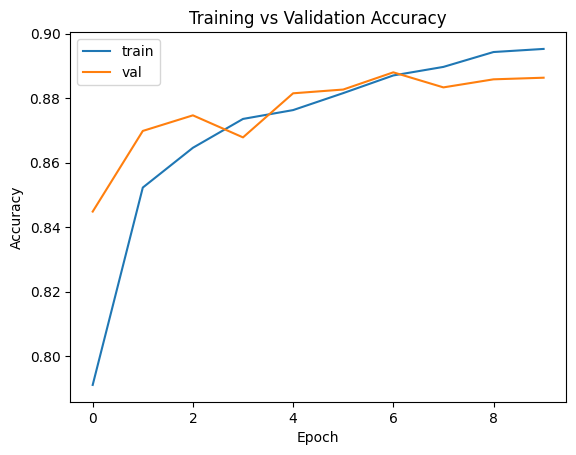

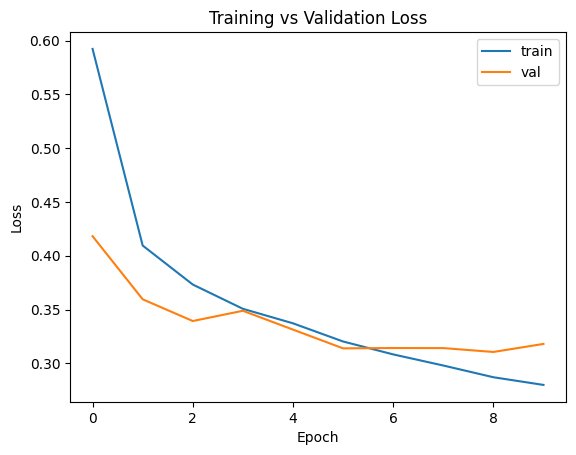

In [3]:

import matplotlib.pyplot as plt

# Use a validation split to monitor generalization
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# Plot accuracy
plt.figure()
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

# Plot loss
plt.figure()
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


In [4]:

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", test_acc)

# Show a few predictions
pred_probs = model.predict(x_test[:12], verbose=0)
pred_labels = pred_probs.argmax(axis=1)

print("True labels   :", y_test[:12])
print("Predicted     :", pred_labels)


Test accuracy: 0.8813999891281128
True labels   : [9 2 1 1 6 1 4 6 5 7 4 5]
Predicted     : [9 2 1 1 6 1 4 6 5 7 4 5]



## 10.6 Practical Regularization Techniques

- **Dropout:** randomly zeroes activations during training to reduce co‑adaptation.  
- **Early stopping:** stops training when validation performance stops improving.  
- **Batch normalization:** stabilizes and accelerates training by normalizing activations.  
- **Weight decay (L2):** penalizes large weights to improve generalization.


In [5]:

# Optional: Early stopping demonstration (re-train a smaller model quickly)
from tensorflow.keras.callbacks import EarlyStopping

small_model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])
small_model.compile(optimizer="adam",
                    loss="sparse_categorical_crossentropy",
                    metrics=["accuracy"])

es = EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True)

hist = small_model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=15,
    batch_size=256,
    callbacks=[es],
    verbose=0
)

test_loss2, test_acc2 = small_model.evaluate(x_test, y_test, verbose=0)
print("Early‑stopped model test accuracy:", test_acc2)


Early‑stopped model test accuracy: 0.8723000288009644



## 10.7 Summary

- An MLP composes linear layers and nonlinear activations to learn complex functions.  
- Cross‑entropy is the standard loss for multiclass classification; MSE is typical for regression.  
- Backpropagation with gradient‑based optimization trains the network end‑to‑end.  
- Keras provides a high‑level API to build, train, and evaluate neural networks.  
- With a compatible NVIDIA setup, TensorFlow can automatically utilize the GPU for acceleration.
